### 6-1データ読込

In [2]:
import pandas as pd

df = pd.read_csv('../datafiles/cinema.csv')
df.head(3) # 先頭3行の中身を表示


,cinema_id,SNS1,SNS2,actor,original,sales
0,1375,291.0,1044,8808.994029,0,9731
1,1000,363.0,568,10290.709370,1,10210
2,1390,158.0,431,6340.388534,1,8227


### 6-2欠損値の確認

In [3]:
df.isnull().any(axis = 0)

cinema_id    False
SNS1          True
SNS2         False
actor         True
original     False
sales        False
dtype: bool

### 6-3欠損値の穴埋め

In [4]:
# 欠損値を平均で補完して、df2に代入
df2 = df.fillna(df.mean())
# 穴埋めができたか確認
df2.isnull().any(axis = 0)

cinema_id    False
SNS1         False
SNS2         False
actor        False
original     False
sales        False
dtype: bool

### 6-4SNS2列とsalesの散布図

<Axes: xlabel='SNS2', ylabel='sales'>

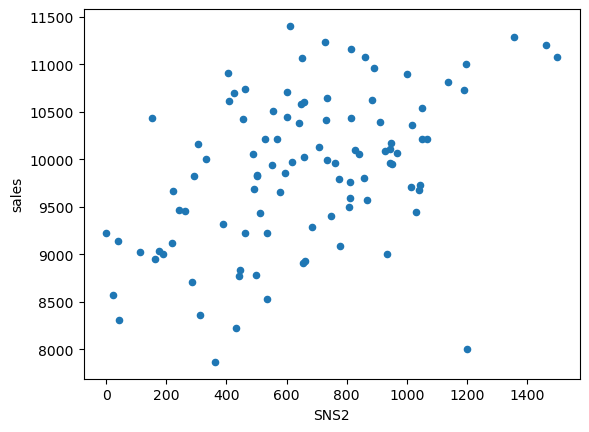

In [5]:
# JupyterLab上にグラフ描画するためのおまじない
# %matplotlib inline

# SNS2とsalesの散布図の作成 ※x軸を特徴量、y軸を正解データとする
df2.plot(kind = 'scatter', x = 'SNS2', y = 'sales')

c:\Users\user\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12475 (\N{KATAKANA LETTER SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12483 (\N{KATAKANA LETTER SMALL TU}) missing from current font.
 

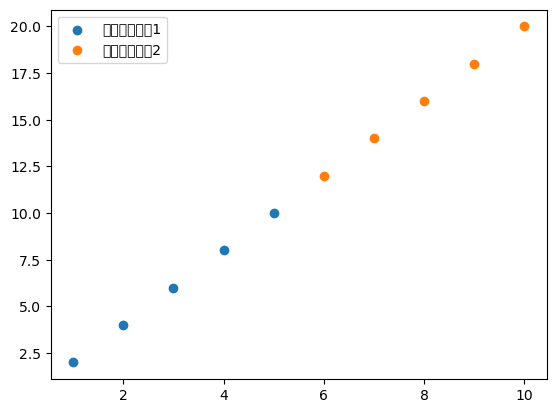

In [6]:
import matplotlib.pyplot as plt

# データを生成
x1 = [1, 2, 3, 4, 5]
y1 = [2, 4, 6, 8, 10]

x2 = [6, 7, 8, 9, 10]
y2 = [12, 14, 16, 18, 20]

# サブプロットを作成
fig, ax = plt.subplots()

# 散布図をプロット
ax.scatter(x1, y1, label="データセット1")
ax.scatter(x2, y2, label="データセット2")

# 凡例を表示
plt.legend()

# グラフを表示
plt.show()

<Axes: xlabel='original', ylabel='sales'>

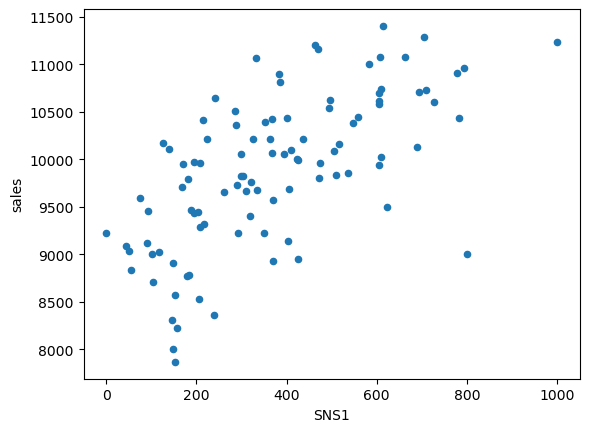

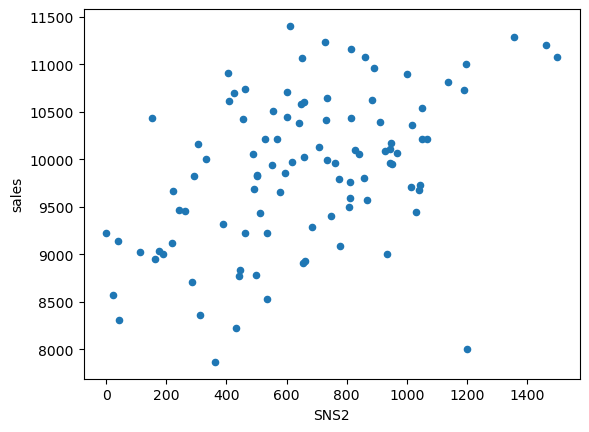

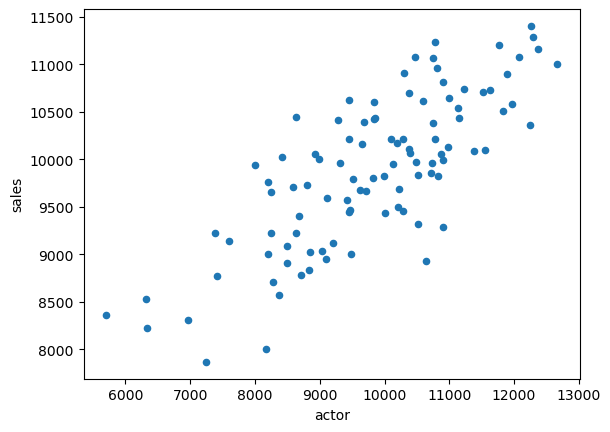

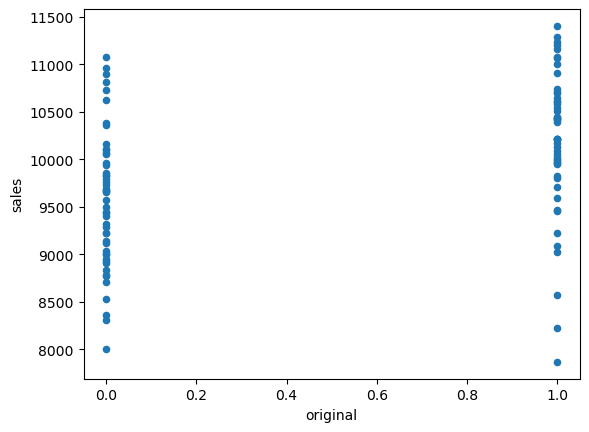

In [7]:
df2.plot(kind = 'scatter', x = 'SNS1', y = 'sales')
df2.plot(kind = 'scatter', x = 'SNS2', y = 'sales')
df2.plot(kind = 'scatter', x = 'actor', y = 'sales')
df2.plot(kind = 'scatter', x = 'original', y = 'sales')

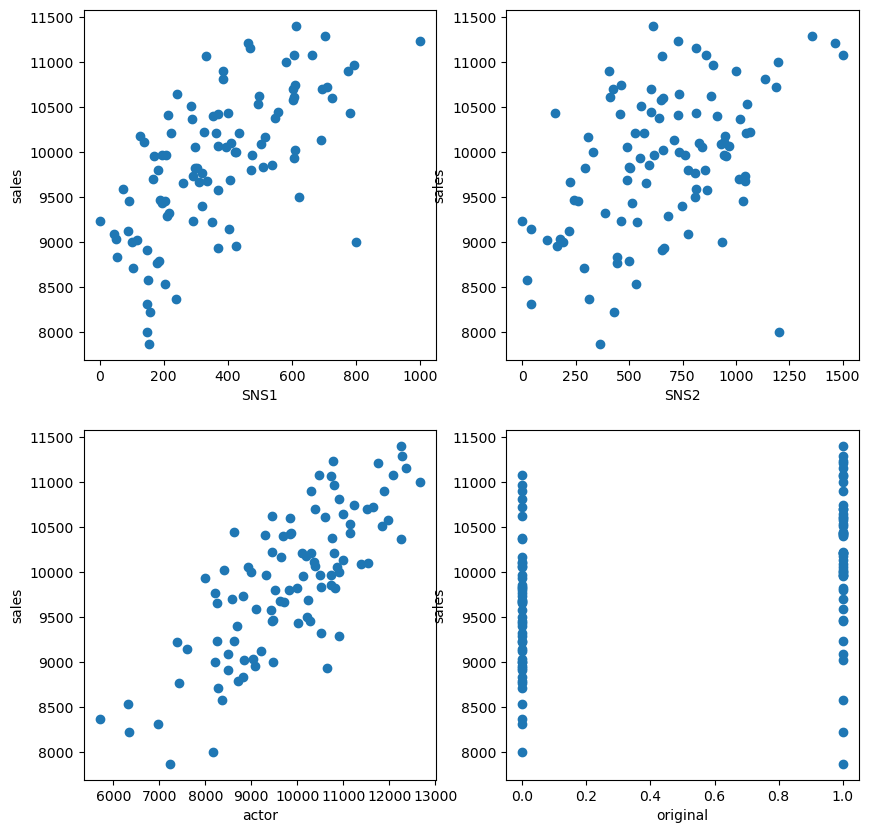

In [8]:
import matplotlib.pyplot as plt

# サブプロットを作成
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# 各サブプロットに散布図をプロット
axes[0, 0].scatter(df2['SNS1'], df2['sales'])
axes[0, 1].scatter(df2['SNS2'], df2['sales'])
axes[1, 0].scatter(df2['actor'], df2['sales'])
axes[1, 1].scatter(df2['original'], df2['sales'])

# x軸とy軸のラベルを設定
axes[0, 0].set_xlabel('SNS1')
axes[0, 1].set_xlabel('SNS2')
axes[1, 0].set_xlabel('actor')
axes[1, 1].set_xlabel('original')
axes[0, 0].set_ylabel('sales')
axes[0, 1].set_ylabel('sales')
axes[1, 0].set_ylabel('sales')
axes[1, 1].set_ylabel('sales')

# グラフを表示
plt.show()


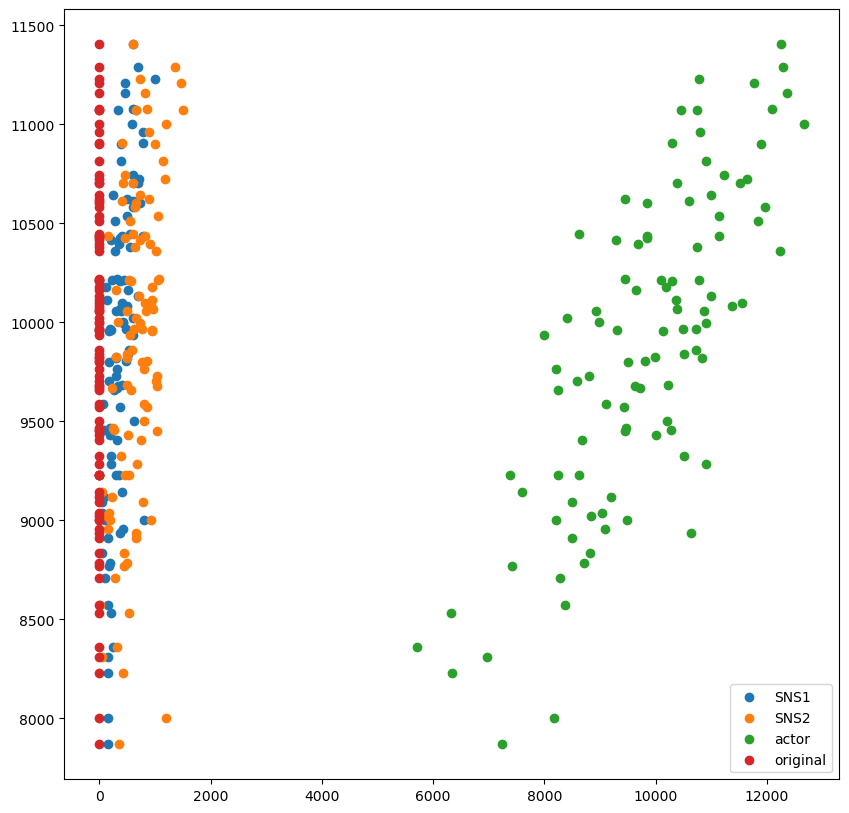

In [9]:
import matplotlib.pyplot as plt

# サブプロットを作成
fig, ax = plt.subplots(figsize=(10, 10))

# 散布図をプロット
ax.scatter(df2['SNS1'], df2['sales'], label='SNS1')
ax.scatter(df2['SNS2'], df2['sales'], label='SNS2')
ax.scatter(df2['actor'], df2['sales'], label='actor')
ax.scatter(df2['original'], df2['sales'], label='original')

# 凡例を表示
plt.legend()

# グラフを表示
plt.show()

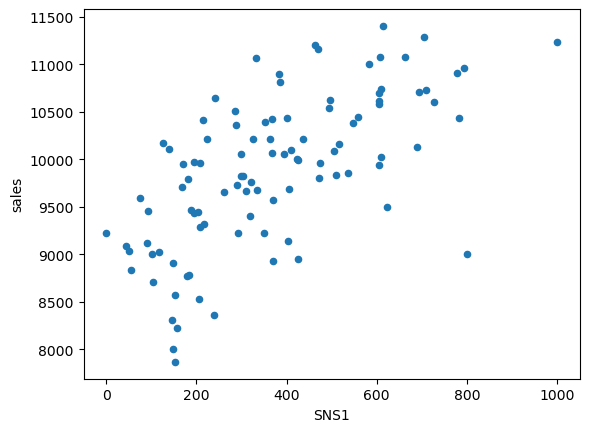

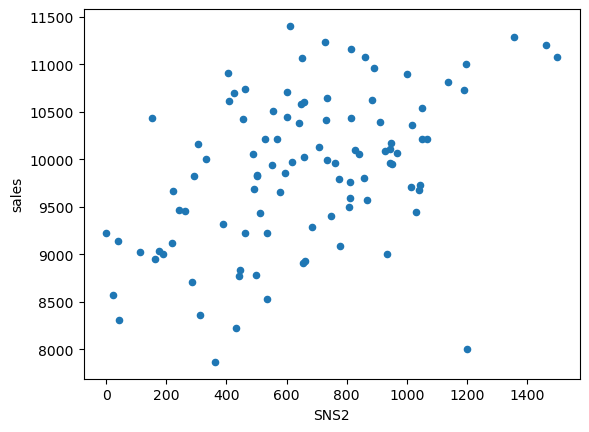

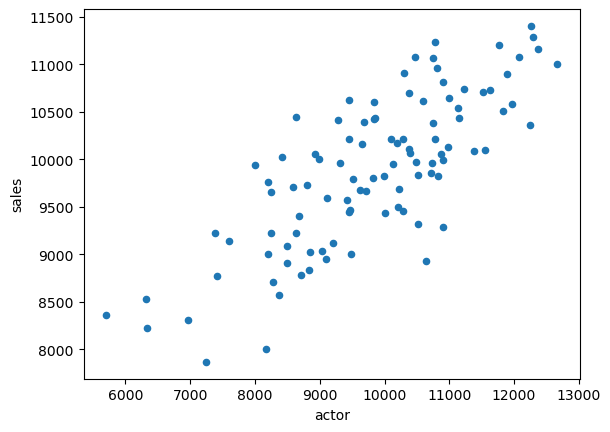

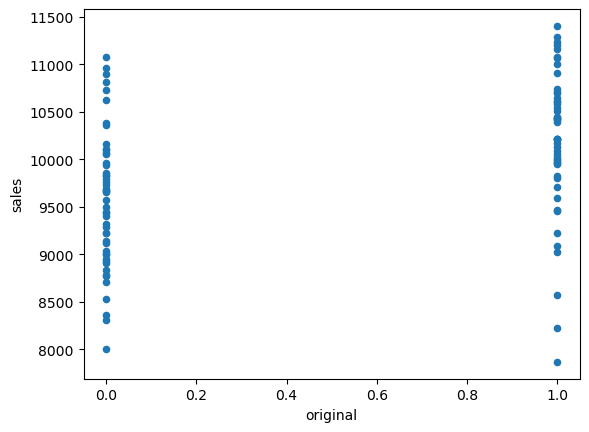

In [10]:
for name in df.columns:
#for name in df: でも可

    # x軸がcinema_id列とsales列の散布図は
    #作っても意味が無いので外す
    if name == 'cinema_id' or name == 'sales':
        continue

    df2.plot(kind = "scatter", x = name, y = "sales")

### 6-7

In [11]:
no = df2[(df2['SNS2'] > 1000) & (df2['sales'] < 8500)].index
df3 = df2.drop(no, axis = 0)

In [12]:
test = pd.DataFrame(
{'Acolumn':[1,2,3],
 'Bcolumn':[4,5,6]
}
)
test

,Acolumn,Bcolumn
0,1,4
1,2,5
2,3,6


In [13]:
test[test['Acolumn'] < 2]

,Acolumn,Bcolumn
0,1,4


In [14]:
test['Acolumn'] < 2

0     True
1    False
2    False
Name: Acolumn, dtype: bool

### 6-11

In [15]:
df[(df['SNS2'] > 1000 ) & (df['sales'] < 8500)]

,cinema_id,SNS1,SNS2,actor,original,sales
30,1855,149.0,1200,8173.096892,0,8000


### 6-12

In [16]:
no = df2[(df['SNS2'] > 1000 ) & (df['sales'] < 8500)].index
no

Index([30], dtype='int64')

6-13 行削除

In [17]:
#元の処理
# test.drop(0,axis=0)

# acolumnが1の行のインデックスを取得
try:
    # 例外が発生する可能性のある処理
    index = test[test['Acolumn'] == 1].index
except Exception as e:
    # 例外が発生した時に実行する処理
    print(e)
else:
    # 正常終了時に実行する処理
    print(index)
    test.drop(index, inplace=True)

test


Index([0], dtype='int64')


,Acolumn,Bcolumn
1,2,5
2,3,6


### 6-14列削除

In [18]:
#元の処理
# test.drop('Bcolumn',axis=1)

# Bcolumn列を削除
try:
    # 例外が発生する可能性のある処理
    test.drop('Bcolumn', axis=1, inplace=True) # B列を削除
except Exception as e:
    # 例外が発生した時に実行する処理
    print(e)
else:
    # 正常終了時に実行する処理
    print(test)



   Acolumn
1        2
2        3


In [19]:
df3 = df2.drop(no, axis = 0) # 外れ値の行を削除
df3.shape # 行が削除できたかどうかを行数で確認

(99, 6)

In [20]:
#特徴量の列の候補
col =['SNS1','SNS2','actor','original']
x=df3[col] #特徴量の抜き出し

t=df3['sales']#正解データの取り出し

In [21]:
# print(df3)
# print(df3["SNS1"])

# インデックスが2、列がSNS1のマスの値のみ参照
df3.loc[2, 'SNS1']

158.0

In [22]:
index = [2, 4, 6] # インデックス
col = ['SNS1', 'actor'] # 列名
df3.loc[index, col]

,SNS1,actor
2,158.0,6340.388534
4,209.0,10908.539550
6,153.0,7237.639848


### 6-19

In [23]:
sample = [10, 20, 30, 40] # リストの作成
sample[1:3] # 添え字が1以上3未満の要素を取得

[20, 30]

In [24]:
# 0行目以上2行目以下、actor列より左の列（actor列含む）
df3.loc[0:3, :'actor']

,cinema_id,SNS1,SNS2,actor
0,1375,291.0,1044,8808.994029
1,1000,363.0,568,10290.709370
2,1390,158.0,431,6340.388534
3,1499,261.0,578,8250.485081


In [25]:
x = df3.loc[ : , 'SNS1':'original'] # 特徴量の取り出し
t = df3['sales'] # 正解ラベルの取り出し
print(x,t)

     SNS1  SNS2         actor  original
0   291.0  1044   8808.994029         0
1   363.0   568  10290.709370         1
2   158.0   431   6340.388534         1
3   261.0   578   8250.485081         0
4   209.0   683  10908.539550         0
..    ...   ...           ...       ...
95  494.0  1050  11137.482810         1
96  505.0   928  11376.038540         1
97  368.0   966  10393.252480         0
98  326.0  1068   9454.019853         1
99  402.0   153  11144.482970         1

[99 rows x 4 columns] 0      9731
1     10210
2      8227
3      9658
4      9286
      ...  
95    10537
96    10084
97    10069
98    10218
99    10435
Name: sales, Length: 99, dtype: int64


### 6-23

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, t,
    test_size = 0.2, random_state = 0)

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### 6-25

In [28]:
model.fit(x_train, y_train)

LinearRegression()

### 6-26

In [29]:
df3.loc['SNS1':'original']

,cinema_id,SNS1,SNS2,actor,original,sales


In [30]:
new = [[150, 700, 300, 0]] # 新しいデータを2次元リストで作成
new2 = pd.DataFrame(new,columns=["SNS1","SNS2","actor","original"])
model.predict(new2) # 学習済みモデルで推論

# df = pd.DataFrame(new)
# model.predict(df) # 学習済みモデルで推論
# df = pd.DataFrame(new, columns=["SNS1","SNS2","actor","original"])
# df3.loc['SNS1':'original']


array([6874.109753])

In [31]:
model.score(x_test, y_test)

0.7903881596570095

### 6-28

In [32]:
# 関数のインポート
from sklearn.metrics import mean_absolute_error

pred = model.predict(x_test)

# 平均絶対誤差の計算(予測と平均の誤差)
mean_absolute_error(y_pred = pred, y_true = y_test)

277.12236964086225

In [33]:
import pickle

with open('cineama.pkl', 'wb') as f:
    pickle.dump(model, f)

In [34]:
print(model.coef_) # 計算式の係数の表示
print(model.intercept_) # 計算式の切片の表示

[  1.07645622   0.53400191   0.28473752 213.95584503]
6253.41872943871


In [35]:
tmp = pd.DataFrame(model.coef_) # データフレームの作成
tmp.index = x_train.columns # 列名をインデックスに指定
tmp

,0
SNS1,1.076456
SNS2,0.534002
actor,0.284738
original,213.955845


### 練習

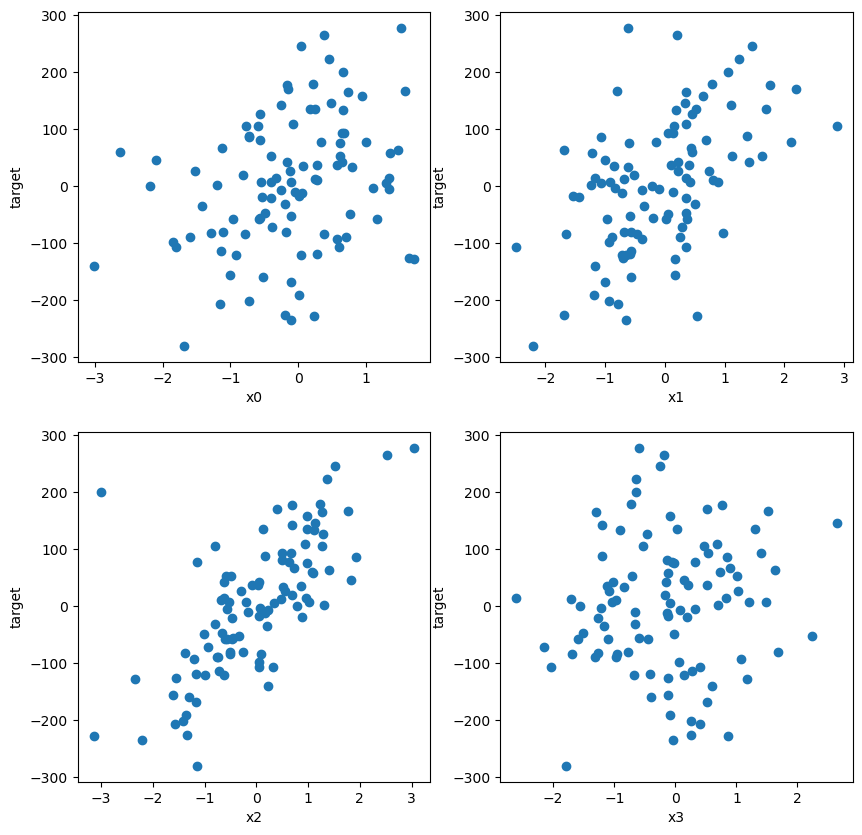

          x0        x1        x2        x3
0   1.000943  2.114344 -1.148213 -0.051415
1   1.505901 -0.626081  3.041686 -0.587336
2  -0.390320  0.283607 -0.940359 -2.154124
3  -0.167273  1.413624 -0.632571 -1.016131
4  -0.728801  1.370530  0.168298 -1.203904
..       ...       ...       ...       ...
95  1.153983 -0.963715 -0.476624 -0.444866
96  0.694385 -0.887651 -0.741163 -1.317783
97 -0.159283  2.193451  0.398708  0.514709
98 -0.105268 -1.009562 -1.166259  0.512022
99 -0.043852  0.131865 -0.158939 -0.666356

[99 rows x 4 columns] 0      77.147293
1     278.595852
2     -71.039904
3      42.193870
4      89.167955
         ...    
95    -56.906275
96    -88.449242
97    170.731644
98   -168.092939
99    -10.455471
Name: target, Length: 99, dtype: float64


array([72.71991863])

In [52]:
#6-1
import pandas as pd

#6-2
df = pd.read_csv('../datafiles/ex3.csv')
df.head(5) # 先頭3行の中身を表示

#6-3
#y=ax+b (a*aa+aaa)+(b*bb+bbb)+(c*cc+ccc)+(d*dd+ddd)=

#6-4
df.isnull().any(axis = 0)
# 欠損値を平均で補完して、df2に代入
df2 = df.fillna(df.median())
# 穴埋めができたか確認
df2.isnull().any(axis = 0)

#6-5
# df2.plot(kind = 'scatter', x = 'x0', y = 'target')

#6-6
import matplotlib.pyplot as plt
# サブプロットを作成
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
# 各サブプロットに散布図をプロット
for ax, x in zip(axes.ravel(), df2.columns[:-1]):
    ax.scatter(df2[x], df2['target'])
    ax.set_xlabel(x)
    ax.set_ylabel('target')
# グラフを表示
plt.show()

#外れ値を除外する
no = df2[(df2['x2'] < -2) & (df2['target'] > 100)].index
df3 = df2.drop(no, axis = 0)
df3.shape

#特徴量と正解を分ける
col =['x0','x1','x2','x3']
x=df3[col] #特徴量の抜き出し
t=df3['target']#正解データの取り出し
print(x,t)

#モデルの作成
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, t,
    test_size = 0.2, random_state = 1)

#線形回帰分析
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#学習
model.fit(x_train, y_train)

#推論
new = [[1.0, 0.5, 0, 1.5]] # 新しいデータを2次元リストで作成
new2 = pd.DataFrame(new,columns=["x0","x1","x2","x3"])
model.predict(new2) # 学習済みモデルで推論


# 演習問題

In [64]:
import pandas as pd

df = pd.read_csv('ex3.csv')

In [65]:
df.head(5)

,x0,x1,x2,x3,target
0,1.000943,2.114344,-1.148213,-0.051415,77.147293
1,1.505901,-0.626081,3.041686,-0.587336,278.595852
2,-0.390320,0.283607,-0.940359,-2.154124,-71.039904
3,-0.167273,1.413624,-0.632571,-1.016131,42.193870
4,-0.728801,1.370530,0.168298,-1.203904,89.167955


In [66]:
df.isnull().sum()

x0        2
x1        0
x2        2
x3        0
target    0
dtype: int64

In [67]:
df2 = df.fillna(df.median())

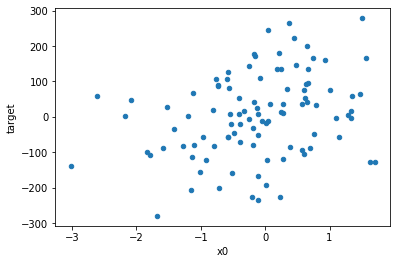

In [68]:
%matplotlib inline
df2.plot(kind = 'scatter', x = 'x0', y = 'target')

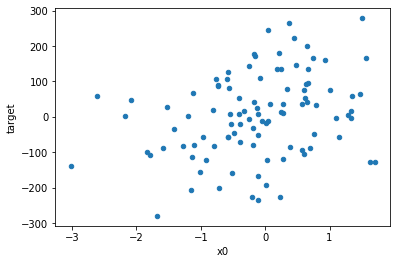

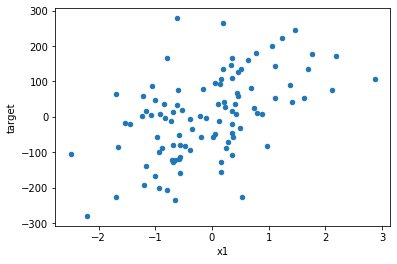

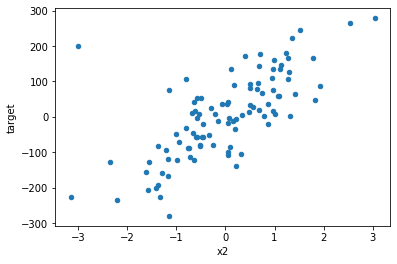

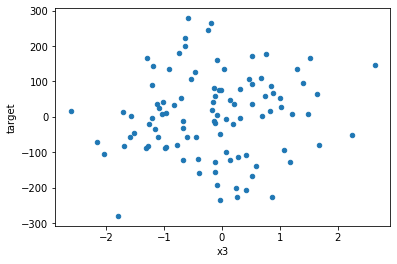

In [69]:
for name in df.columns:
    if name == 'target':
        continue
    df2.plot(kind = 'scatter', x = name, y = 'target')

In [70]:
no = df2[ (df2['x2'] < -2) & (df2['target'] > 100)].index

df3 = df2.drop(no, axis = 0)

In [71]:
x = df3.loc[:, :'x3']
t = df3['target']

In [1]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, t,
    test_size = 0.2, random_state = 1)

NameError: name 'x' is not defined

In [73]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [74]:
model.score(x_test, y_test)

0.9820345074421969